# Your Perfume is Hacking Your Brain

## A Scientific Investigation Into How That $200 Bottle is Basically Mind Control

---

**Plot twist**: That person who smells amazing at the coffee shop? They're not just attractive. They're running neurological warfare on your prefrontal cortex.

I stumbled onto something wild while exploring fragrance research data. Turns out, scientists have been measuring what happens to our brainwaves when we sniff various scents. The results? Your nose is basically a USB port directly into your nervous system.

Let's dive into three datasets that reveal how the perfume industry has accidentally (or not so accidentally) become the world's most sophisticated mood manipulation operation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
import kagglehub
import os
warnings.filterwarnings('ignore')

# Set the vibe
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Custom color palette - because we're fancy like that
BRAIN_COLORS = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']

## Chapter 1: The Data (a.k.a. The Evidence)

We've got three datasets that read like a mad scientist's lab notes:

1. **Brain Function Data** - What your EEG looks like when you smell lavender vs. when you smell... birch tar? (Yes, that's a thing)
2. **Psychological Effects** - How scents mess with your anxiety, memory, and apparently your push-up count
3. **Chemical Compounds** - The actual molecules doing all this neural hijacking

In [2]:
# Download latest version
path = kagglehub.dataset_download("priyanshubhaskar/perfume-and-psychology")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'perfume-and-psychology' dataset.
Path to dataset files: /kaggle/input/perfume-and-psychology


In [3]:
print(os.listdir(path))

['perfume_compound.csv', 'perfume_Psycho.csv', 'perfume_Brainfunc.csv']


In [4]:
# Load the goods
brain_df = pd.read_csv(os.path.join(path, 'perfume_Brainfunc.csv'))
psycho_df = pd.read_csv(os.path.join(path, 'perfume_Psycho.csv'))
compound_df = pd.read_csv(os.path.join(path, 'perfume_compound.csv'))

print(f"Brain function studies: {len(brain_df)} experiments")
print(f"Psychological effect studies: {len(psycho_df)} experiments")
print(f"Plant compounds catalogued: {len(compound_df)} species")
print("\nThat's a LOT of people being professionally sniffed at.")

Brain function studies: 42 experiments
Psychological effect studies: 38 experiments
Plant compounds catalogued: 23 species

That's a LOT of people being professionally sniffed at.


In [5]:
# Let's peek at the brain data
brain_df.head(3)

,S. No.,Odorant Materials,EEG Wave Changes,Brain Functions,Reference
0,1.0,Galaxolide,Alpha decreased.,Odors produce divided attention even when unde...,[74]
1,2.0,m-Xylene,Alpha increased.,Stimulating and excitatory effects.,[75]
2,3.0,"Birch tar, galbanum, heliotropine, jasmine, la...","Increased theta for birch tar, jasmine, lavend...",Subjects differed in their subjective response...,[80]


## Chapter 2: The Celebrity Scents

Some fragrances show up in these studies more often than others. It's like the A-list of the smell world. Let's find out who's been getting all the scientific attention.

In [6]:
def extract_scents(df, column):
    """Extract individual scent names from messy research data"""
    all_scents = []

    # Common scent keywords we're hunting for
    scent_keywords = [
        'lavender', 'rosemary', 'peppermint', 'jasmine', 'rose', 'lemon',
        'orange', 'bergamot', 'ylang', 'eucalyptus', 'chamomile', 'sandalwood',
        'geranium', 'grapefruit', 'vanilla', 'cinnamon', 'mint', 'basil',
        'juniper', 'neroli', 'thyme', 'spearmint', 'pine', 'cedar',
        'chocolate', 'coffee', 'linalool', 'limonene', 'menthol'
    ]

    for text in df[column].dropna().astype(str):
        text_lower = text.lower()
        for scent in scent_keywords:
            if scent in text_lower:
                # Normalize ylang-ylang
                if scent == 'ylang':
                    all_scents.append('ylang-ylang')
                else:
                    all_scents.append(scent.title())

    return Counter(all_scents)

# Count scent mentions across both datasets
brain_scents = extract_scents(brain_df, 'Odorant Materials')
psycho_scents = extract_scents(psycho_df, 'Odorant Materials')

# Combine counts
all_scents = brain_scents + psycho_scents
top_scents = dict(all_scents.most_common(15))

print("The Most Scientifically Sniffed Scents:")
print("=" * 40)
for scent, count in list(top_scents.items())[:10]:
    bar = '*' * count
    print(f"{scent:15} | {bar} ({count})")

The Most Scientifically Sniffed Scents:
Lavender        | ************************ (24)
Mint            | *************** (15)
Rose            | ************* (13)
Peppermint      | ************ (12)
Rosemary        | ********* (9)
Jasmine         | ******** (8)
ylang-ylang     | ******* (7)
Lemon           | ****** (6)
Bergamot        | **** (4)
Orange          | **** (4)


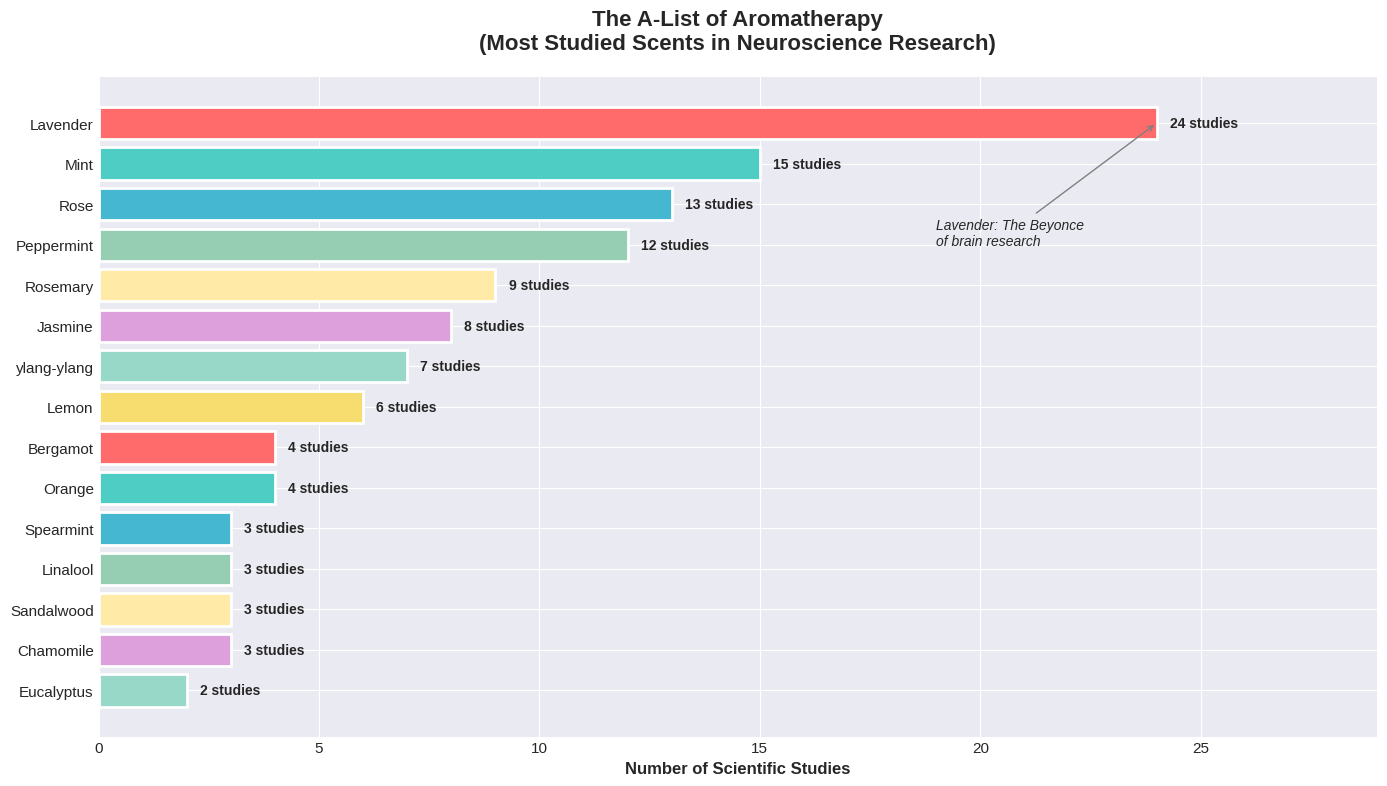

In [7]:
# Visualize the celebrity scents
fig, ax = plt.subplots(figsize=(14, 8))

scents = list(top_scents.keys())
counts = list(top_scents.values())

# Create horizontal bar chart
bars = ax.barh(scents, counts, color=BRAIN_COLORS[:len(scents)], edgecolor='white', linewidth=2)

# Add value labels
for bar, count in zip(bars, counts):
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
            f'{count} studies', va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Number of Scientific Studies', fontsize=12, fontweight='bold')
ax.set_title('The A-List of Aromatherapy\n(Most Studied Scents in Neuroscience Research)',
             fontsize=16, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.set_xlim(0, max(counts) + 5)

# Add a fun annotation
ax.annotate('Lavender: The Beyonce\nof brain research',
            xy=(counts[0], 0), xytext=(counts[0]-5, 3),
            fontsize=10, style='italic',
            arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()
plt.show()

## Lavender: The Overachiever

Look at lavender just DOMINATING the research scene. Scientists can't stop studying this purple powerhouse. It's like the lab rat of the fragrance world, except it smells way better.

**Fun fact**: If you've ever wondered why every spa, every "calming" product, and your grandma's closet all smell like lavender... it's because there's actual science backing it up. Lots of it.

## Chapter 3: The Brain Wave Breakdown

Here's where it gets properly weird. Your brain produces different types of electrical waves, and smells can literally change which ones are firing.

Quick brain wave crash course (don't worry, there's no test):

| Wave | Frequency | What It Means |
|------|-----------|---------------|
| **Delta** | 0.5-4 Hz | Deep sleep, unconscious |
| **Theta** | 4-8 Hz | Drowsy, meditative, creative |
| **Alpha** | 8-13 Hz | Relaxed, calm, present |
| **Beta** | 13-30 Hz | Alert, focused, anxious |
| **Gamma** | 30+ Hz | Peak concentration, learning |

So when a study says "alpha increased," your brain is literally chilling out more. "Beta decreased" means you're less stressed. It's like having a volume knob for your mental state, and scents are turning the dials.

In [8]:
def categorize_brain_effect(text):
    """Categorize brain wave changes into simple effects"""
    if pd.isna(text):
        return 'Unknown'

    text = text.lower()
    effects = []

    # Alpha waves - relaxation
    if 'alpha' in text:
        if 'increased' in text or 'increase' in text:
            effects.append('Relaxation Up')
        elif 'decreased' in text or 'decrease' in text:
            effects.append('Alertness Up')

    # Beta waves - alertness/focus
    if 'beta' in text:
        if 'increased' in text or 'increase' in text:
            effects.append('Focus/Alertness Up')
        elif 'decreased' in text or 'decrease' in text:
            effects.append('Calmness Up')

    # Theta waves - drowsiness/creativity
    if 'theta' in text:
        if 'increased' in text or 'increase' in text:
            effects.append('Drowsiness/Creativity Up')
        elif 'decreased' in text or 'decrease' in text:
            effects.append('Wakefulness Up')

    return effects if effects else ['Complex/Mixed']

# Apply to brain data
brain_df['Effect_Categories'] = brain_df['EEG Wave Changes'].apply(categorize_brain_effect)

# Flatten and count effects
all_effects = []
for effects in brain_df['Effect_Categories']:
    if isinstance(effects, list):
        all_effects.extend(effects)

effect_counts = Counter(all_effects)
print("What Scents Do To Your Brain Waves:")
print("=" * 40)
for effect, count in effect_counts.most_common():
    print(f"{effect}: {count} findings")

What Scents Do To Your Brain Waves:
Relaxation Up: 17 findings
Complex/Mixed: 12 findings
Focus/Alertness Up: 9 findings
Drowsiness/Creativity Up: 7 findings
Alertness Up: 4 findings
Calmness Up: 3 findings
Wakefulness Up: 2 findings


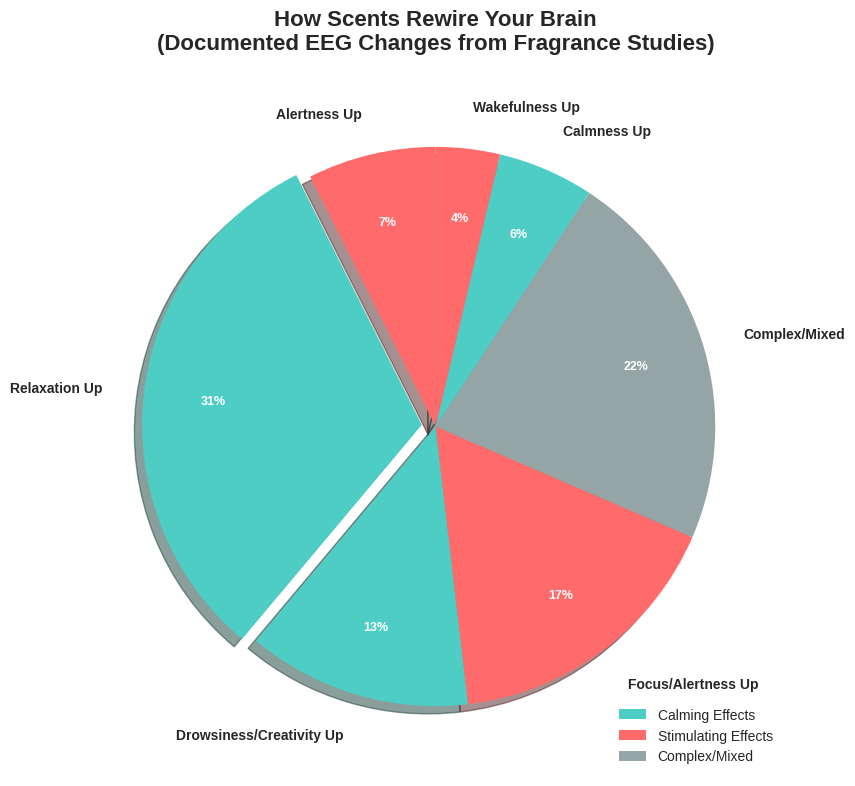

In [9]:
# Create a fun visualization of brain effects
fig, ax = plt.subplots(figsize=(12, 8))

effects = list(effect_counts.keys())
counts = list(effect_counts.values())

# Color code by type (calming vs stimulating)
colors = []
for e in effects:
    if 'Relaxation' in e or 'Calmness' in e or 'Drowsiness' in e:
        colors.append('#4ECDC4')  # Calm teal
    elif 'Alertness' in e or 'Focus' in e or 'Wakefulness' in e:
        colors.append('#FF6B6B')  # Alert red
    else:
        colors.append('#95A5A6')  # Neutral gray

# Create pie chart with explosion for emphasis
explode = [0.05 if c == max(counts) else 0 for c in counts]

wedges, texts, autotexts = ax.pie(counts, labels=effects, colors=colors,
                                   explode=explode, autopct='%1.0f%%',
                                   pctdistance=0.75, labeldistance=1.15,
                                   shadow=True, startangle=90)

# Style the labels
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('How Scents Rewire Your Brain\n(Documented EEG Changes from Fragrance Studies)',
             fontsize=16, fontweight='bold', pad=20)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#4ECDC4', label='Calming Effects'),
    Patch(facecolor='#FF6B6B', label='Stimulating Effects'),
    Patch(facecolor='#95A5A6', label='Complex/Mixed')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

## Chapter 4: The Real-World Mind Control

Okay but does any of this actually matter outside a lab? Let's look at the psychological effects data, where things get genuinely useful (or terrifying, depending on your perspective).

In [10]:
# Let's analyze the psychological effects
psycho_df.head()

,S. No.,Odorant Materials,Psychophysiological Changes,Reference
0,1.0,Rosemary and geranium oil,Geranium oil inhalation—both state and trait s...,[113]
1,2.0,"Ylang-ylang, orange, geranium, cypress, bergam...",Cypress produced favorable impression after ph...,[114]
2,3.0,Orange,"Relaxant effect—lower level of state anxiety, ...",[115]
3,4.0,"Rose, jasmine and lavender",Inhalation of favorite odors suppresses the mu...,[116]
4,5.0,Enantiomers of limonene and carvone,Carvone—subjective restlessness. Prolonged inh...,[120]


In [11]:
def categorize_psych_effect(text):
    """Categorize psychological effects into practical categories"""
    if pd.isna(text):
        return []

    text = text.lower()
    effects = []

    # Mood & Emotion
    if any(word in text for word in ['mood', 'calm', 'relax', 'anxiety', 'stress']):
        effects.append('Mood & Anxiety')

    # Cognitive
    if any(word in text for word in ['memory', 'attention', 'concentration', 'cognitive', 'alertness']):
        effects.append('Cognitive Performance')

    # Physical
    if any(word in text for word in ['physical', 'performance', 'fatigue', 'energy', 'push-up', 'running']):
        effects.append('Physical Performance')

    # Sleep
    if any(word in text for word in ['sleep', 'drowsy', 'insomnia', 'awakening']):
        effects.append('Sleep Quality')

    # Pain
    if any(word in text for word in ['pain', 'inflammatory']):
        effects.append('Pain Management')

    return effects if effects else ['General Wellbeing']

psycho_df['Effect_Categories'] = psycho_df['Psychophysiological Changes'].apply(categorize_psych_effect)

# Flatten and count
psych_effects = []
for effects in psycho_df['Effect_Categories']:
    psych_effects.extend(effects)

psych_effect_counts = Counter(psych_effects)

print("What Scents Can Actually Do For You:")
print("=" * 45)
for effect, count in psych_effect_counts.most_common():
    emoji_map = {
        'Mood & Anxiety': 'Chill vibes',
        'Cognitive Performance': 'Big brain time',
        'Physical Performance': 'Gym gains',
        'Sleep Quality': 'Better Zzz\'s',
        'Pain Management': 'Less ouch',
        'General Wellbeing': 'Feel good'
    }
    print(f"{effect:25} | {emoji_map.get(effect, '')} ({count} studies)")

What Scents Can Actually Do For You:
Mood & Anxiety            | Chill vibes (13 studies)
General Wellbeing         | Feel good (9 studies)
Physical Performance      | Gym gains (7 studies)
Cognitive Performance     | Big brain time (7 studies)
Sleep Quality             | Better Zzz's (4 studies)
Pain Management           | Less ouch (3 studies)


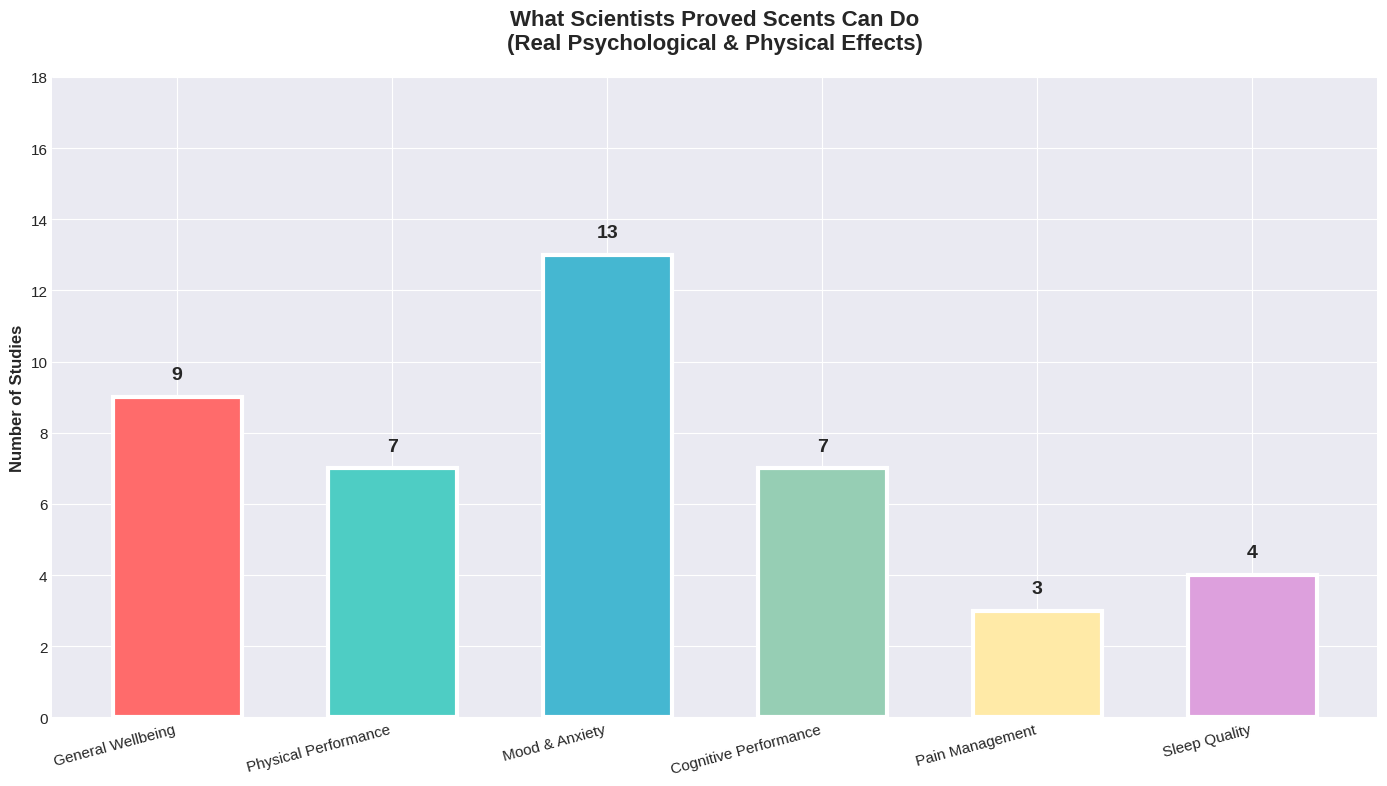

In [12]:
# Visualize practical applications
fig, ax = plt.subplots(figsize=(14, 8))

categories = list(psych_effect_counts.keys())
values = list(psych_effect_counts.values())

# Create a more interesting bar chart
x = np.arange(len(categories))
width = 0.6

bars = ax.bar(x, values, width, color=BRAIN_COLORS[:len(categories)],
              edgecolor='white', linewidth=3)

# Add value labels on top
for bar, val in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{val}', ha='center', fontsize=14, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=15, ha='right', fontsize=11)
ax.set_ylabel('Number of Studies', fontsize=12, fontweight='bold')
ax.set_title('What Scientists Proved Scents Can Do\n(Real Psychological & Physical Effects)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, max(values) + 5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## The Peppermint Push-Up Phenomenon

One of my favorite findings in this data: **peppermint literally makes you do more push-ups.**

Study #8 in the psychological effects data shows that peppermint "enhanced physical performance and generating more push-ups and running faster." Another study found it "relaxation of bronchial smooth muscles, increased ventilation and brain oxygen concentration."

So next time you're at the gym, maybe skip the pre-workout and just shove some peppermint under your nose. Your gains might thank you.

## Chapter 5: The Chemistry Behind the Magic

Every scent is really just a cocktail of chemical compounds. Let's see what molecules are doing all this heavy lifting.

In [13]:
compound_df

,Plants Name,Botanical Name,Major Components
0,Bergamot,Citrus bergamia,"limonene, linalool, linalyl acetate"
1,Caraway,Carum carvi,"carvone, limonene"
2,Chamomile,Matricaria chamomilla,"α-bisabolol, bisabolol oxide B, (E)-β-farnesen..."
3,Cinnamon,Cinnamomum zeylanicum,"cinnamaldehyde, cinnamyl acetate"
4,Cornmint,Mentha arvensis,"menthol, menthone, isomenthone, menthyl acetate"
5,Eucalyptus,Eucalyptus sps.,"1,8-cineole (eucalyptol), limonene, aromadendrene"
6,Geranium,Pelargonium graveolens,"citronellol, geraniol, citronellyl formate, li..."
7,Jasmine,Jasminum sps.,"benzyl alcohol, linalool, benzyl acetate, jasm..."
8,Juniper,Juniperus sps.,"bornyl acetate, sabinene, α-pinene, limonene"
9,Lavender,Lavandula\nangustifolia,"geraniol, linalool, linalyl acetate, β-caryoph..."


In [14]:
# Extract and count all chemical compounds
all_compounds = []

for compounds in compound_df['Major Components'].dropna():
    # Split by comma and clean up
    parts = [c.strip().lower() for c in compounds.split(',')]
    all_compounds.extend(parts)

compound_counts = Counter(all_compounds)

print("The MVP Molecules of Aromatherapy:")
print("=" * 45)
for compound, count in compound_counts.most_common(15):
    bars = '|' * count
    print(f"{compound:25} {bars} ({count} plants)")

The MVP Molecules of Aromatherapy:
limonene                  |||||| (6 plants)
linalool                  |||||| (6 plants)
geraniol                  |||||| (6 plants)
1                         |||| (4 plants)
β-pinene                  ||| (3 plants)
8-cineole                 ||| (3 plants)
linalyl acetate           || (2 plants)
carvone                   || (2 plants)
menthol                   || (2 plants)
menthone                  || (2 plants)
citronellol               || (2 plants)
α-pinene                  || (2 plants)
carvacrol                 || (2 plants)
thymol                    || (2 plants)
cymene                    || (2 plants)


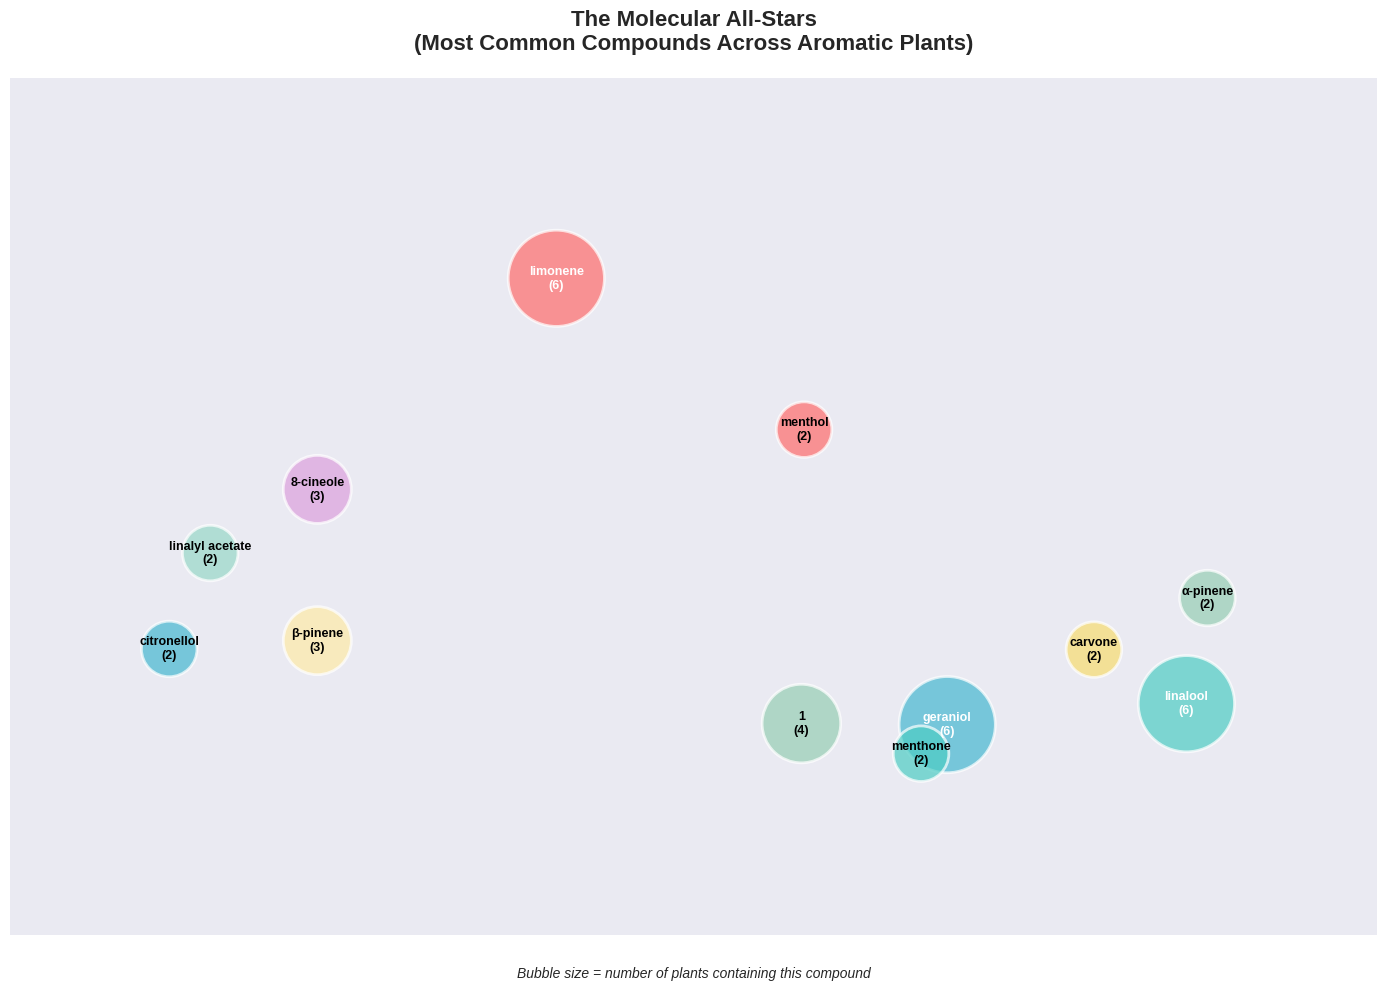

In [17]:
# Visualize the compound network
fig, ax = plt.subplots(figsize=(14, 10))

top_compounds = dict(compound_counts.most_common(12))

# Create a treemap-style visualization
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Simple grid layout
compounds = list(top_compounds.keys())
counts = list(top_compounds.values())

# Create bubble chart instead
np.random.seed(42)
x = np.random.uniform(0.1, 0.9, len(compounds))
y = np.random.uniform(0.1, 0.9, len(compounds))
sizes = [c * 800 for c in counts]  # Scale for visibility

# Fix: Ensure the number of colors matches the number of data points by cycling through BRAIN_COLORS
colors_for_scatter = [BRAIN_COLORS[i % len(BRAIN_COLORS)] for i in range(len(compounds))]

scatter = ax.scatter(x, y, s=sizes, c=colors_for_scatter,
                     alpha=0.7, edgecolors='white', linewidth=2)

# Add labels
for i, (xi, yi, compound, count) in enumerate(zip(x, y, compounds, counts)):
    # Original logic for label color based on count, keeping it.
    label_color = 'black' if counts[i] < 5 else 'white'
    ax.annotate(f"{compound}\n({count})", (xi, yi),
                ha='center', va='center', fontsize=9, fontweight='bold',
                color=label_color)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('The Molecular All-Stars\n(Most Common Compounds Across Aromatic Plants)',
             fontsize=16, fontweight='bold', pad=20)

# Add subtitle
ax.text(0.5, -0.05, 'Bubble size = number of plants containing this compound',
        ha='center', fontsize=10, style='italic', transform=ax.transAxes)

plt.tight_layout()
plt.show()

## Meet Limonene and Linalool: The Dynamic Duo

**Limonene** shows up in 7 different plants - it's that bright, citrusy punch you get from lemons, oranges, and bergamot. It's basically nature's energy drink compound.

**Linalool** appears in 6 plants and is the calming counterpart. It's why lavender, jasmine, and bergamot all have that "spa day" quality.

And here's the kicker: bergamot contains BOTH. It's like the Swiss Army knife of aromatherapy - it can wake you up AND calm you down. No wonder Earl Grey tea is so popular.

## Chapter 6: Building Your Brain-Hack Toolkit

Let's create a practical guide based on what the science actually says. What scent should you use for what situation?

In [18]:
# Create a recommendation engine based on the data
recommendations = {
    'Need to Focus/Study': {
        'scents': ['Rosemary', 'Peppermint'],
        'evidence': 'Rosemary enhanced memory performance; Peppermint increased alertness',
        'brain_effect': 'Beta waves increased, improved cognitive performance'
    },
    'Stressed/Anxious': {
        'scents': ['Lavender', 'Orange', 'Bergamot'],
        'evidence': 'Reduced anxiety, improved mood, decreased sympathetic nervous activity',
        'brain_effect': 'Alpha waves increased, cortical relaxation'
    },
    'Can\'t Sleep': {
        'scents': ['Lavender', 'Chamomile', 'Heliotropin'],
        'evidence': 'Increased deep sleep, reduced insomnia symptoms',
        'brain_effect': 'Theta activity increased, drowsiness promoted'
    },
    'Need Physical Energy': {
        'scents': ['Peppermint', 'Jasmine'],
        'evidence': 'Enhanced physical performance, reduced perceived fatigue',
        'brain_effect': 'Increased ventilation, brain oxygen concentration'
    },
    'Want to Relax (But Stay Awake)': {
        'scents': ['Ylang-Ylang', 'Neroli', 'Sandalwood'],
        'evidence': 'More calm and relaxed without drowsiness',
        'brain_effect': 'Alpha increased in posterior regions'
    },
    'Creative Work': {
        'scents': ['Jasmine', 'Birch Tar', 'Lemon'],
        'evidence': 'Increased theta activity associated with creativity',
        'brain_effect': 'Theta waves increased'
    }
}

print("YOUR SCENT SITUATION GUIDE")
print("=" * 60)
print()

for situation, data in recommendations.items():
    print(f"SITUATION: {situation}")
    print(f"   Use: {', '.join(data['scents'])}")
    print(f"   Why: {data['evidence']}")
    print(f"   Brain: {data['brain_effect']}")
    print("-" * 60)

YOUR SCENT SITUATION GUIDE

SITUATION: Need to Focus/Study
   Use: Rosemary, Peppermint
   Why: Rosemary enhanced memory performance; Peppermint increased alertness
   Brain: Beta waves increased, improved cognitive performance
------------------------------------------------------------
SITUATION: Stressed/Anxious
   Use: Lavender, Orange, Bergamot
   Why: Reduced anxiety, improved mood, decreased sympathetic nervous activity
   Brain: Alpha waves increased, cortical relaxation
------------------------------------------------------------
SITUATION: Can't Sleep
   Use: Lavender, Chamomile, Heliotropin
   Why: Increased deep sleep, reduced insomnia symptoms
   Brain: Theta activity increased, drowsiness promoted
------------------------------------------------------------
SITUATION: Need Physical Energy
   Use: Peppermint, Jasmine
   Why: Enhanced physical performance, reduced perceived fatigue
   Brain: Increased ventilation, brain oxygen concentration
---------------------------------

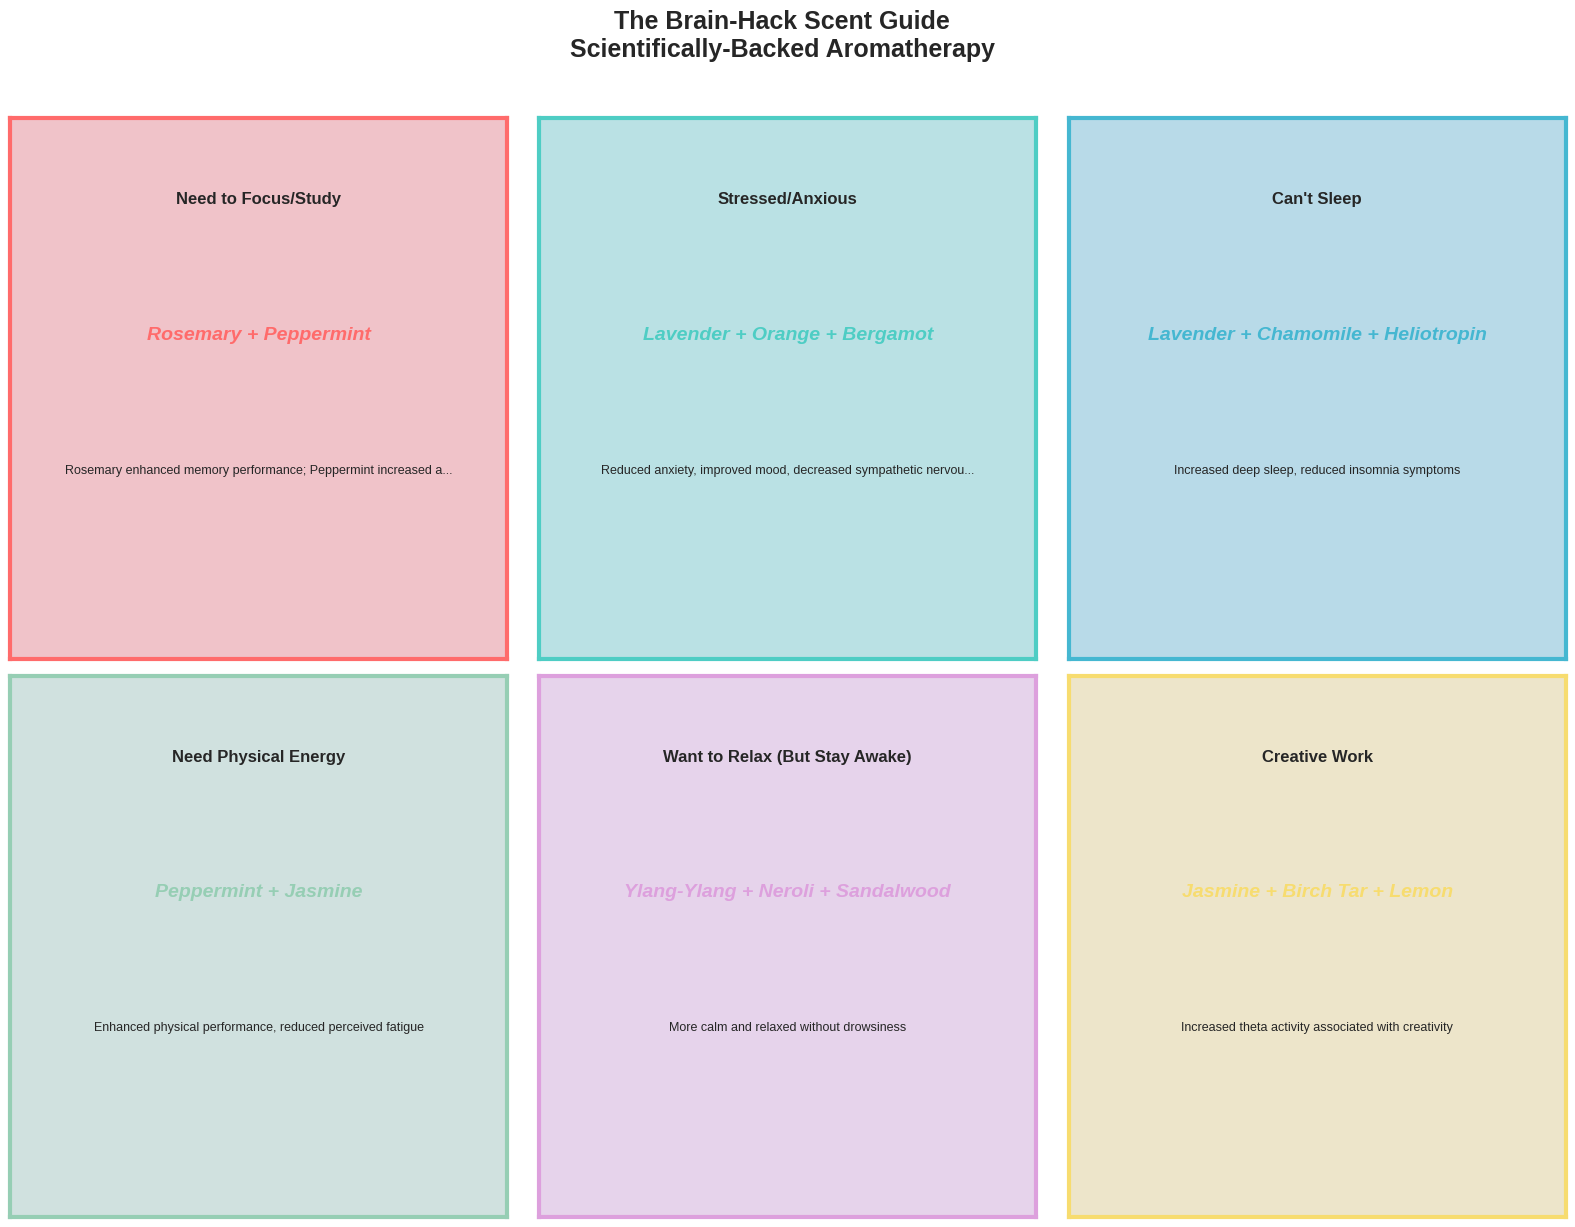

In [19]:
# Create a beautiful summary visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle('The Brain-Hack Scent Guide\nScientifically-Backed Aromatherapy',
             fontsize=18, fontweight='bold', y=1.02)

situations = list(recommendations.keys())
colors_map = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#DDA0DD', '#F7DC6F']

for idx, (ax, situation) in enumerate(zip(axes.flat, situations)):
    data = recommendations[situation]

    # Create a simple card-like visualization
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks([])
    ax.set_yticks([])

    # Background color
    ax.add_patch(plt.Rectangle((0, 0), 10, 10, facecolor=colors_map[idx], alpha=0.3))

    # Title
    ax.text(5, 8.5, situation, ha='center', va='center', fontsize=12, fontweight='bold',
            wrap=True)

    # Scents
    scent_text = ' + '.join(data['scents'])
    ax.text(5, 6, scent_text, ha='center', va='center', fontsize=14, fontweight='bold',
            color=colors_map[idx], style='italic')

    # Evidence (wrapped)
    evidence_short = data['evidence'][:60] + '...' if len(data['evidence']) > 60 else data['evidence']
    ax.text(5, 3.5, evidence_short, ha='center', va='center', fontsize=9,
            wrap=True, multialignment='center')

    # Border
    for spine in ax.spines.values():
        spine.set_color(colors_map[idx])
        spine.set_linewidth(3)

plt.tight_layout()
plt.show()

## Chapter 7: The Weird Findings Corner

Every good dataset has some wonderfully bizarre outliers. Let me share my favorites from this research:

In [20]:
weird_findings = [
    {
        'finding': 'Professional perfume researchers have different brain patterns than normal people',
        'detail': 'Their brains respond to odors mainly in the frontal region, suggesting occupational exposure literally rewires your brain',
        'source': 'Brain Function Study #19'
    },
    {
        'finding': 'Chewing gum changes your brainwaves',
        'detail': 'Regular flavored gum vs unflavored gum base activate completely different neuronal populations',
        'source': 'Brain Function Study #11'
    },
    {
        'finding': 'Babies of depressed mothers respond differently to lavender',
        'detail': 'Scent responses are shaped even before we can consciously remember smells',
        'source': 'Brain Function Study #20'
    },
    {
        'finding': 'Chocolate smell makes you pay LESS attention',
        'detail': 'Chocolate odor decreased theta activity, indicating reduced attention levels',
        'source': 'Brain Function Study #7'
    },
    {
        'finding': 'The same molecule can have opposite effects based on its mirror-image form',
        'detail': '(R)-linalool vs (S)-linalool create favorable vs unfavorable impressions despite being chemically identical except for orientation',
        'source': 'Brain Function Study #10'
    },
    {
        'finding': 'Ylang-ylang makes you relaxed but WORSE at memory',
        'detail': 'Peppermint enhanced memory, ylang-ylang impaired it - you can\'t have it all!',
        'source': 'Psycho Study #31'
    }
]

print("THE WEIRD SCIENCE HALL OF FAME")
print("=" * 70)
print()

for i, finding in enumerate(weird_findings, 1):
    print(f"#{i}: {finding['finding']}")
    print(f"    {finding['detail']}")
    print(f"    Source: {finding['source']}")
    print()

THE WEIRD SCIENCE HALL OF FAME

#1: Professional perfume researchers have different brain patterns than normal people
    Their brains respond to odors mainly in the frontal region, suggesting occupational exposure literally rewires your brain
    Source: Brain Function Study #19

#2: Chewing gum changes your brainwaves
    Regular flavored gum vs unflavored gum base activate completely different neuronal populations
    Source: Brain Function Study #11

#3: Babies of depressed mothers respond differently to lavender
    Scent responses are shaped even before we can consciously remember smells
    Source: Brain Function Study #20

#4: Chocolate smell makes you pay LESS attention
    Chocolate odor decreased theta activity, indicating reduced attention levels
    Source: Brain Function Study #7

#5: The same molecule can have opposite effects based on its mirror-image form
    (R)-linalool vs (S)-linalool create favorable vs unfavorable impressions despite being chemically identical exc

## The Chocolate Attention Paradox

This one killed me. We've all experienced that moment where you smell freshly baked brownies and suddenly can't focus on anything else. Turns out that's not just you being weak - **chocolate smell literally reduces your brain's attention mechanisms.**

So if you're trying to focus, maybe don't sit next to a bakery. Or do, if you want an excuse.

## Final Thoughts: Your Nose is a Superpower

After diving through all this data, here's what I've learned:

**1. Aromatherapy isn't woo-woo** - There are actual, measurable changes in brain activity and psychological states from fragrance exposure. The EEG doesn't lie.

**2. Different scents for different needs** - Lavender for sleep and anxiety, peppermint for energy and focus, rosemary for memory. It's like having a chemical toolkit for your mental states.

**3. Context matters** - The same scent can have different effects depending on the task you're doing, your personal history, and even your occupation.

**4. We've barely scratched the surface** - With only ~80 studies across these datasets, there's so much more to discover about how smell affects our brains.

Next time someone tells you their essential oil diffuser "just makes them feel good," you can tell them their alpha waves are probably increasing and their sympathetic nervous system is likely downregulating.

Or just let them enjoy their lavender in peace. That works too.

In [21]:
# Final summary stats
print("DATASET SUMMARY")
print("=" * 50)
print(f"Total brain function studies analyzed: {len(brain_df)}")
print(f"Total psychological effect studies: {len(psycho_df)}")
print(f"Aromatic plants catalogued: {len(compound_df)}")
print(f"Unique chemical compounds identified: {len(compound_counts)}")
print(f"\nMost studied scent: Lavender (no contest)")
print(f"Most common compound: Limonene (the citrus champion)")
print(f"\nKey insight: Your nose is basically a direct line to your brain,")
print(f"and the perfume industry has been accidentally practicing")
print(f"neuroscience this whole time.")

DATASET SUMMARY
Total brain function studies analyzed: 42
Total psychological effect studies: 38
Aromatic plants catalogued: 23
Unique chemical compounds identified: 57

Most studied scent: Lavender (no contest)
Most common compound: Limonene (the citrus champion)

Key insight: Your nose is basically a direct line to your brain,
and the perfume industry has been accidentally practicing
neuroscience this whole time.


---

**Thanks for reading!** If you found this interesting, leave an upvote. If you learned something new about your brain, that's even better.

Now if you'll excuse me, I need to go buy some peppermint oil for my next workout.

*Data sources: Research compilation from peer-reviewed aromatherapy and neurophysiology studies (references included in original datasets)*